In [2]:
import numpy as np
import pandas as pd

In [3]:
train_df = pd.read_csv('E:/kaggle1/train.csv')

In [4]:
import os

In [5]:
os.getcwd()

'C:\\WINDOWS\\system32'

In [6]:
train_df.head()

,Id,Abstract,Category
0,0,The energy released in a solar flare is part...,astro-ph
1,1,In light of current atmospheric neutrino osc...,hep-ph
2,2,We consider the following basic learning tas...,cs.LG
3,3,"In this paper, we characterise the family of...",math.CO
4,4,The control of condensed matter systems out ...,cond-mat.mes-hall


In [7]:
train_df.shape

(7500, 3)

In [8]:
abstracts = train_df.iloc[:, 1]

In [9]:
print(type(abstracts))

<class 'pandas.core.series.Series'>


In [10]:
documents = abstracts.to_list()

In [11]:
lower_case_documents = []
for i in documents:
    lower_case_documents.append(i.lower())
print(lower_case_documents)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [12]:
train_df.head()

,Id,Abstract,Category
0,0,The energy released in a solar flare is part...,astro-ph
1,1,In light of current atmospheric neutrino osc...,hep-ph
2,2,We consider the following basic learning tas...,cs.LG
3,3,"In this paper, we characterise the family of...",math.CO
4,4,The control of condensed matter systems out ...,cond-mat.mes-hall


In [13]:
train_df=train_df.drop_duplicates().sort_values('Category')

In [14]:
train_df.head()

,Id,Abstract,Category
0,0,The energy released in a solar flare is part...,astro-ph
3234,3234,We present an infrared adaptation of the Clu...,astro-ph
6975,6975,A detailed model of galactic evolution is pr...,astro-ph
901,901,We report on the detection of four primordia...,astro-ph
909,909,We introduce neutrino astronomy from the obs...,astro-ph


In [15]:
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)
from spellchecker import SpellChecker

spell = SpellChecker()
def correct_spellings(text):
    corrected_text = []
    misspelled_words = spell.unknown(text.split())
    for word in text.split():
        if word in misspelled_words:
            corrected_text.append(spell.correction(word))
        else:
            corrected_text.append(word)
    return " ".join(corrected_text)
import re
import nltk
from nltk.corpus import stopwords
from textblob import TextBlob
from textblob import Word
from unidecode import unidecode
import contractions
nltk.download('wordnet')
STOPWORDS = set(stopwords.words('english'))
def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text.replace('[^\w\s]','')
    text = unidecode(text)
    #text = remove_html(text)
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # remove stopwors from text
    return text
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

#train_df['Abstract'] =  train_df['Abstract'].apply(clean_text)
#train_df['Abstract'].apply(lambda x: str(TextBlob(x).correct()))
train_df['Abstract'] = train_df['Abstract'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
#train_df['Abstract'] = train_df['Abstract'].apply(lambda x: x.replace('&gt;', ''))

#Removing Rare words
#freq = pd.Series(' '.join(train_df['Abstract']).split()).value_counts()[-10:]
#freq = list(freq.index)
#train_df['Abstract'] = train_df['Abstract'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))


train_df.head()

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Arka1\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


,Id,Abstract,Category
0,0,The energy released in a solar flare is partit...,astro-ph
3234,3234,We present an infrared adaptation of the Clust...,astro-ph
6975,6975,A detailed model of galactic evolution is prop...,astro-ph
901,901,We report on the detection of four primordial ...,astro-ph
909,909,We introduce neutrino astronomy from the obser...,astro-ph


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
import seaborn as sns
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from itertools import product

from sklearn.ensemble import VotingClassifier

In [17]:
cv_counts=CountVectorizer(stop_words='english', binary=False)
cv_counts

CountVectorizer(stop_words='english')

In [18]:
#X_counts=cv_counts.fit_transform(train_df.Abstract).toarray()
#print(X_counts)
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
pipe = Pipeline([('count', TfidfVectorizer(stop_words='english')),
                 ('tfid', TfidfTransformer())]).fit(train_df.Abstract)
X_counts = pipe['count'].transform(train_df.Abstract).toarray()

In [19]:
X_counts.shape

(7500, 28669)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X_counts, train_df.Category, test_size=0.2, random_state=123)
X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [21]:
type(X_train)

numpy.ndarray

In [22]:
from sklearn.svm import NuSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix


alpha_val = [0.0001, 0.01, 0.1, 1, 1.1]
val_acc_array = []
for i in alpha_val: 
    clf_Multinomial = SGDClassifier(alpha = i)
    clf_Multinomial.fit(X_train,y_train)
    val_acc_array.append(clf_Multinomial.score(X_test,y_test))
    
    
#clf_Multinomial= MultinomialNB(alpha = 0.15)
#clf_Multinomial = ExtraTreesClassifier(n_estimators=100, random_state=0)
#clf_Multinomial.fit(X_train,y_train)
#clf_Multinomial = LogisticRegressionCV(cv=5, random_state=0, max_iter = 1000).fit(X_train, y_train)
#kernel = 1.0 * RBF(1.0)
#clf_Multinomial = GaussianProcessClassifier(kernel=kernel, random_state=0).fit(X_train, y_train)
#clf_Multinomial = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1, max_iter = 5000)
#clf_Multinomial.fit(X_train, y_train)

#from sklearn.svm import SVC
#from sklearn.pipeline import make_pipeline
#from sklearn.preprocessing import StandardScaler
#clf_Multinomial = make_pipeline(StandardScaler(with_mean=False), SVC(gamma='auto', kernel = 'linear'))
#clf_Multinomial.fit(X_train,y_train)

#clf1 = DecisionTreeClassifier(max_depth=4)
#clf2 = KNeighborsClassifier(n_neighbors=7)
#clf3 = SVC(kernel='rbf', probability=True)
#clf_Multinomial = VotingClassifier(estimators=[('dt', clf1), ('knn', clf2), ('svc', clf3)],
                        #voting='soft', weights=[2, 1, 2])

#clf_Multinomial.fit(X_train,y_train)

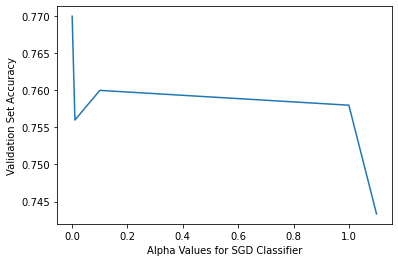

In [23]:
plt.xlabel("Alpha Values for SGD Classifier")
plt.ylabel("Validation Set Accuracy")
plt.plot(alpha_val,val_acc_array)

In [40]:
w_c_d = train_df[train_df.Category=='astro-ph.CO']
stop_words = set(STOPWORDS)

In [41]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd
import matplotlib.pyplot as plt
comment_words = ""
# Iterating through the .csv data file 
for i in w_c_d.Abstract: 
    i = str(i) 
    separate = i.split() 
    for j in range(len(separate)): 
        separate[j] = separate[j].lower() 
      
    comment_words += " ".join(separate)+" "

In [42]:
# Creating the Word Cloud
final_wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='black', 
                stopwords = stop_words, 
                min_font_size = 10).generate(comment_words)

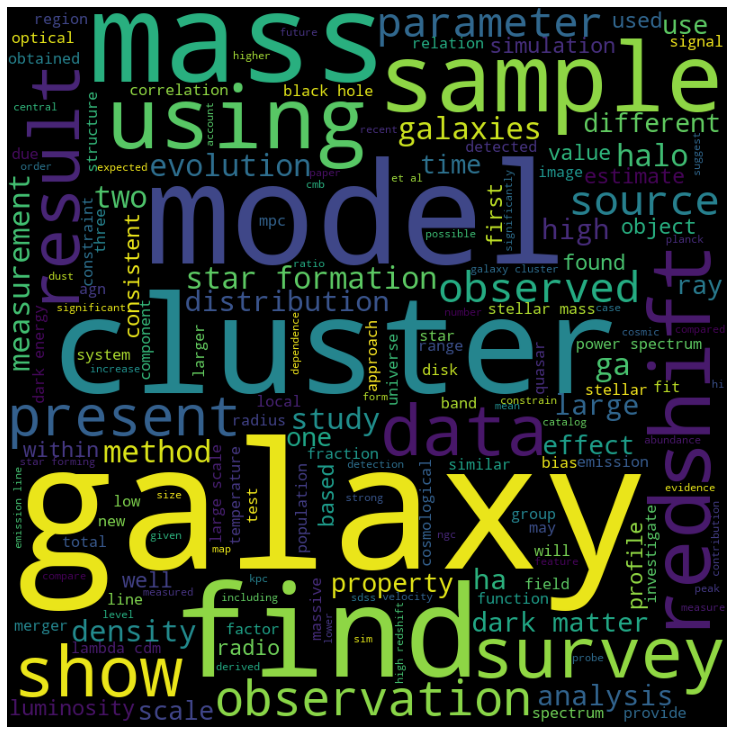

In [43]:
# Displaying the WordCloud                    
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(final_wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

In [39]:
train_df.Category.unique()

array(['astro-ph', 'astro-ph.CO', 'astro-ph.GA', 'astro-ph.SR',
       'cond-mat.mes-hall', 'cond-mat.mtrl-sci', 'cs.LG', 'gr-qc',
       'hep-ph', 'hep-th', 'math.AP', 'math.CO', 'physics.optics',
       'quant-ph', 'stat.ML'], dtype=object)

In [147]:
print("Hi")

Hi


In [148]:
print('The Train score for Multinomial is {0}'.format(clf_Multinomial.score(X_train,y_train)))

The Train score for Multinomial is 1.0


The Test score for Multinomial is 0.7626666666666667


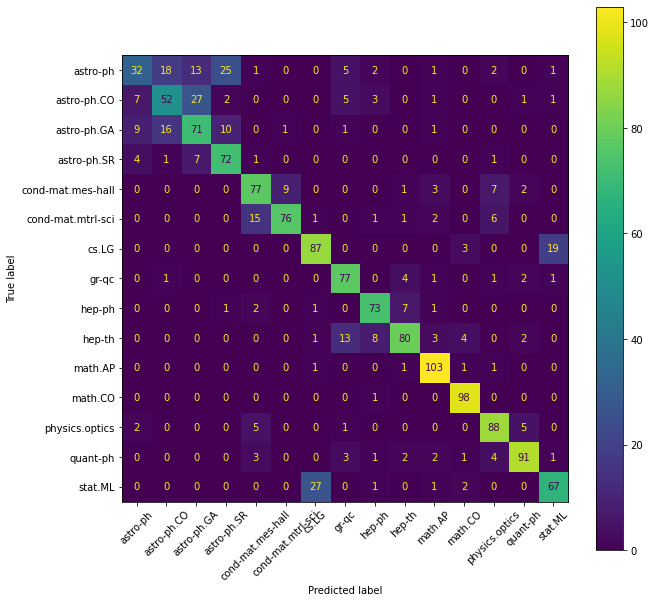

In [149]:
print('The Test score for Multinomial is {0}'.format(clf_Multinomial.score(X_test,y_test)))

#test = clf_Multinomial.predict(X_test)
#confusion_matrix(test, y_test)
fig, ax = plt.subplots(figsize=(10, 10))
plot_confusion_matrix(clf_Multinomial, X_test, y_test, ax = ax)  # doctest: +SKIP
for tick in ax.get_xticklabels():
    tick.set_rotation(45)
plt.show()  # doctest: +SKIP

In [144]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
y_pred = clf_Multinomial.predict(X_test)
print(recall_score(y_test, y_pred, average="macro"))

0.7880293047714876


In [67]:
clf_Multinomial.predict(pipe.transform(["The progenitor systems of Type-Ia supernovae (SNe Ia) are yet unknown. The collisional-triple SN Ia progenitor model posits that SNe Ia result from head-on collisions of binary white dwarfs (WDs), driven by dynamical perturbations by the tertiary stars in mild-hierarchical triple systems. To reproduce the Galactic SN Ia rate, at least ~30-55 per cent of all WDs would need to be in triple systems of a specific architecture. We test this scenario by searching the Gaia DR2 database for the postulated progenitor triples. Within a volume out to 120 pc, we search around Gaia-resolved double WDs with projected separations up to 300 au, for physical tertiary companions at projected separations out to 9000 au. At 120 pc, Gaia can detect faint low-mass tertiaries down to the bottom of the main sequence and to the coolest WDs. Around 27 double WDs, we identify zero tertiaries at such separations, setting a 95 per cent confidence upper limit of 11 per cent on the fraction of binary WDs that are part of mild hierarchical triples of the kind required by the model. As only a fraction (likely ~10 per cent) of all WDs are in <300 au WD binaries, the potential collisional-triple progenitor population appears to be at least an order of magnitude (and likely several) smaller than required by the model"]))

array(['astro-ph.SR'], dtype=object)

In [245]:
test_df = pd.read_csv('E:/kaggle1/test.csv')

In [246]:
temp_list = []

for index, row in test_df.iterrows():
    val_pred = clf_Multinomial.predict(pipe.transform([row['Abstract']]))
    temp_list.append(val_pred[0])
temp_list

['stat.ML',
 'astro-ph.SR',
 'astro-ph.SR',
 'math.AP',
 'cs.LG',
 'gr-qc',
 'math.CO',
 'cond-mat.mtrl-sci',
 'astro-ph.CO',
 'math.CO',
 'cond-mat.mtrl-sci',
 'hep-ph',
 'hep-th',
 'astro-ph.SR',
 'cs.LG',
 'gr-qc',
 'astro-ph.CO',
 'gr-qc',
 'math.AP',
 'astro-ph.CO',
 'cond-mat.mes-hall',
 'astro-ph.CO',
 'math.CO',
 'hep-ph',
 'cs.LG',
 'astro-ph.CO',
 'cond-mat.mes-hall',
 'cond-mat.mes-hall',
 'cond-mat.mtrl-sci',
 'astro-ph.SR',
 'stat.ML',
 'hep-ph',
 'quant-ph',
 'astro-ph.SR',
 'cs.LG',
 'cond-mat.mtrl-sci',
 'physics.optics',
 'cs.LG',
 'cs.LG',
 'hep-ph',
 'hep-ph',
 'quant-ph',
 'astro-ph.SR',
 'math.CO',
 'astro-ph.SR',
 'astro-ph.CO',
 'gr-qc',
 'astro-ph.SR',
 'quant-ph',
 'astro-ph.GA',
 'stat.ML',
 'cs.LG',
 'stat.ML',
 'astro-ph.GA',
 'astro-ph.SR',
 'math.AP',
 'cs.LG',
 'hep-th',
 'math.CO',
 'gr-qc',
 'hep-th',
 'math.CO',
 'astro-ph',
 'stat.ML',
 'astro-ph.GA',
 'hep-ph',
 'astro-ph.SR',
 'astro-ph',
 'math.AP',
 'astro-ph.SR',
 'astro-ph.GA',
 'cs.LG',
 'astro

In [247]:
df_final_preds = pd.DataFrame(temp_list)

In [248]:
df_final_preds

,0
0,stat.ML
1,astro-ph.SR
2,astro-ph.SR
3,math.AP
4,cs.LG
...,...
14995,astro-ph.CO
14996,physics.optics
14997,astro-ph.CO
14998,gr-qc


In [249]:
df_final_preds = df_final_preds.rename(columns={0: "Category"})

In [250]:
df_final_preds.columns

Index(['Category'], dtype='object')

In [251]:
df_final_preds

,Category
0,stat.ML
1,astro-ph.SR
2,astro-ph.SR
3,math.AP
4,cs.LG
...,...
14995,astro-ph.CO
14996,physics.optics
14997,astro-ph.CO
14998,gr-qc


In [252]:
list(df_final_preds.columns)

['Category']

In [253]:
df_final_preds = df_final_preds.rename(columns={0: "Category"})

In [254]:
df_final_preds

,Category
0,stat.ML
1,astro-ph.SR
2,astro-ph.SR
3,math.AP
4,cs.LG
...,...
14995,astro-ph.CO
14996,physics.optics
14997,astro-ph.CO
14998,gr-qc


In [255]:
df_final_preds["Id"] = df_final_preds.index

In [256]:
df_final_preds

,Category,Id
0,stat.ML,0
1,astro-ph.SR,1
2,astro-ph.SR,2
3,math.AP,3
4,cs.LG,4
...,...,...
14995,astro-ph.CO,14995
14996,physics.optics,14996
14997,astro-ph.CO,14997
14998,gr-qc,14998


In [257]:
columns_titles = ["Id","Category"]
df_final_preds=df_final_preds.reindex(columns=columns_titles)

In [258]:
df_final_preds

,Id,Category
0,0,stat.ML
1,1,astro-ph.SR
2,2,astro-ph.SR
3,3,math.AP
4,4,cs.LG
...,...,...
14995,14995,astro-ph.CO
14996,14996,physics.optics
14997,14997,astro-ph.CO
14998,14998,gr-qc


In [259]:
df_final_preds.to_csv('arka161.zip', index=False)

In [260]:
os.getcwd()

'C:\\WINDOWS\\system32'

In [261]:
df_final_preds.to_csv("C:/kaggle4", index = False)

In [132]:
depth=np.arange(1,100,10)
train_score=[]
test_score=[]

for i in depth:
    randforest=RandomForestClassifier(n_estimators=25, max_depth=i)
    randforest.fit(X_train, y_train)
    train_score.append(randforest.score(X_train,y_train))
    test_score.append(randforest.score(X_test,y_test))

KeyboardInterrupt: 

In [ ]:
plt.plot(depth, train_score, label= 'Train Score')
plt.plot(depth, test_score, label= 'Test Score')
plt.legend()
plt.title('Random Forest - Depth vs Accuracy')
plt.xlabel('Max Tree depth')
plt.ylabel('Accuracy')

In [ ]:
randforest=RandomForestClassifier(n_estimators=25, max_depth=40)
randforest.fit(X_train, y_train)
print('The train score for Random Forest is {0}'.format(randforest.score(X_train,y_train)))
print('The test score for Random Forest is {0}'.format(randforest.score(X_test,y_test)))

In [ ]:

linSVC=LinearSVC()
linSVC.fit(X_train,y_train)
print('The train score of Linear SVM is {0}'.format(linSVC.score(X_train,y_train)))
print('The test score of Linear SVM is {0}'.format(linSVC.score(X_test,y_test)))